In [127]:
#How to export your images to an image file (png)
#Each plot has a line of code like this:
#plt.savefig('plot.png', dpi=300, bbox_inches='tight')

#All you need to do is un-comment it before running the program

In [128]:
# Select a station
selected_soil_station = 'Minot'

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [130]:
#Importing data, creating a copy, and assigning it to a variable
raw_data = pd.read_csv('all-deep-soil-temperatures.csv', index_col=1, parse_dates=True)
df_all_stations = raw_data.copy()

#Setting the program to iterate based off of the station of the users choice
df_selected_station = df_all_stations[df_all_stations['Station'] == selected_soil_station]
df_selected_station.fillna(method = 'ffill', inplace=True);
#df_selected_station.head()   ##Just for checking what the dataframe looks like at this point



In [131]:
# Indexes the data by day and creates a column that keeps track of the day
df_selected_station_D=df_selected_station.resample(rule='D').mean()
df_selected_station_D['Day'] = df_selected_station_D.index.dayofyear
#df_selected_station_D.head()

In [132]:
#888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888

#Trying to remove the outliers from the code ###Not fully working yet - this would require scipy if it works
#df_selected_station_D[np.abs(stats.zscore(df_selected_station_D['175 cm'])) > 175]['175 cm'] = df_selected_station_D['175 cm'].mean()
#df_selected_station_D.head()

#Another Possible Route for doing so
#df_selected_station_D["175 cm"] = np.where(df_selected_station_D["175 cm"] >175, median,df_selected_station_D['175 cm'])
#df_selected_station_D.head()

In [133]:
# A simple way to export the updated dataframe to a csv
# df_selected_station.to_csv('Daily_Data.csv')

Text(0.5, 1.0, 'Deep-Soil Temperature trends for Minot')

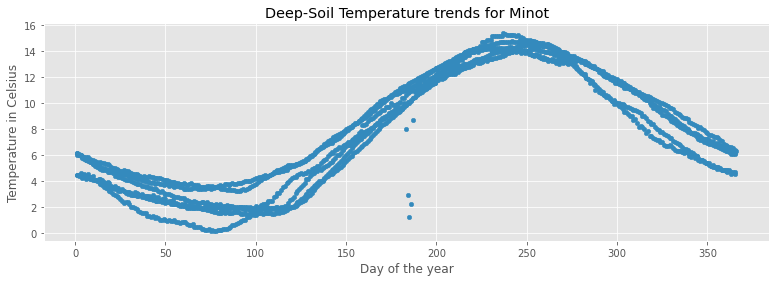

In [134]:
ax = df_selected_station_D.plot.scatter(x='Day', y='175 cm', figsize=(13,4));
ax.set_xlabel("Day of the year")
ax.set_ylabel("Temperature in Celsius")
ax.set_title("Deep-Soil Temperature trends for " + str(selected_soil_station))

In [135]:
#Assigning variable so that mean represents df_selected_station_D but indexed by day
####I think this is where I would need to update the mean df so that it is in water years
mean=df_selected_station_D.groupby(by='Day').mean()
mean['Day']=mean.index

#This inserts a new column named 'Topsoil' at the end that represents the average between 5 cm, 10 cm, and 20 cm
mean['Topsoil']=mean[['5 cm', '10 cm','20 cm']].mean(axis=1)


#Creating range columns for the line graph to use 
maxx=df_selected_station_D.groupby(by='Day').max()
minn=df_selected_station_D.groupby(by='Day').min()
#maxxxx=df_selected_station_D.groupby(by='Day').max()
#minnnn=df_selected_station_D.groupby(by='Day').min()
mean['maxx05']=maxx['5 cm']
mean['minn05']=minn['5 cm']
mean['maxx10']=maxx['10 cm']
mean['minn10']=minn['10 cm']
mean['maxx20']=maxx['20 cm']
mean['minn20']=minn['20 cm']

#8888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888
#Adding columns to the mean dataframe to represent the min and max range for topsoil------Get Mohsens help with this portion
#I am concerned that I am pulling the min & max of those three columns and returning the lowest rather than 
#Averaging theme and returning the lowest average for that date
#mean['maxTopsoil']=maxx[['5 cm', '10 cm','20 cm']].max(axis=1)
#mean['minTopsoil']=minn[['5 cm', '10 cm','20 cm']].min(axis=1)
mean['maxTopsoil']=mean[['maxx05', 'maxx10','maxx20']].mean(axis=1)
mean['minTopsoil']=mean[['minn05', 'minn10','minn20']].mean(axis=1)
#88888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888

#mean['topsoilMax']=maxx['Topsoil']
#mean['topsoilMin']=minn['Topsoil']

#mean.head()


In [136]:
#df_selected_station_D.head() # I only have this here to help me keep track of what I am doing

In [137]:
#Sets the date range in the visualizations to water years

#def day_of_water_year(some_date):
    # Get the date of the previous October 1st
#    water_year_start_date = dt.datetime(some_date.year + some_date.month // 10 - 1, 10, 1)
    
    # Return the number of days since then
#    return (some_date - water_year_start_date).days + 1

#df_selected_station_D['Day'] = df_selected_station_D.index.to_series().apply(day_of_water_year)
#df_selected_station_D.head()


Text(0.5, 1.0, 'Soil Temp, Air Temp, and Snow Depth for Minot')

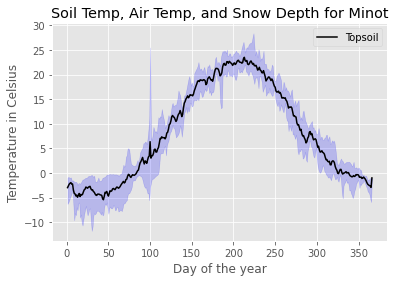

In [138]:
# I would like y to equal 'Topsoil' -----------------A MORE COMPLETE COPY IS AT THE BOTTOM
# I would also need to use:
# plt.fill_between(mean['Day'],mean['minTopsoil'],mean['maxTopsoil'],color='blue',alpha = 0.2);
# This is depends on fixing the range for topsoil in the mean df

plt.style.use('ggplot')
bx = mean.plot(x='Day', y='Topsoil',color='black')
plt.fill_between(mean['Day'],mean['minTopsoil'],mean['maxTopsoil'],color='blue',alpha = 0.2);
bx.set_xlabel("Day of the year")
bx.set_ylabel("Temperature in Celsius")
bx.set_title("Soil Temp, Air Temp, and Snow Depth for " + str(selected_soil_station))

# x axis label and title for graph

In [139]:
def day_of_water_year(some_date):
    # Get the date of the previous October 1st
    water_year_start_date = dt.datetime(some_date.year + some_date.month // 10 - 1, 10, 1)
    
    # Return the number of days since then
    return (some_date - water_year_start_date).days + 1

In [140]:
#This sets the df_selected_station_D dataframe to group data by month
#I need to recreate this for the mean dataframe
df_selected_station_D['Month'] = df_selected_station_D.index.month
#mean['Month'] = mean.index.month

#This is not yet working the way I want it too. Topsoil returns NaN
#This adds a  column named 'Topsoil' to represent the average between 5 cm, 10cm, and 20 cm
df_selected_station_D['Topsoil']=mean[['5 cm', '10 cm','20 cm']].mean(axis=1)

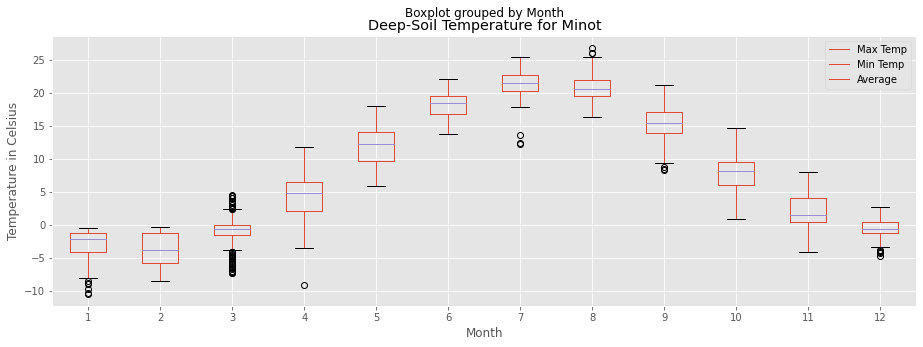

In [141]:
bx = df_selected_station_D.boxplot(column='20 cm', by='Month',figsize=(15,5),grid=True);
bx.set_ylabel('Temperature in Celsius')
bx.set_title('Deep-Soil Temperature for ' + str(selected_soil_station))
#plt.savefig((str(selected_soil_station) + '_boxplot.png'), dpi=300, bbox_inches='tight')
plt.legend(['Max Temp', 'Min Temp', 'Average'])

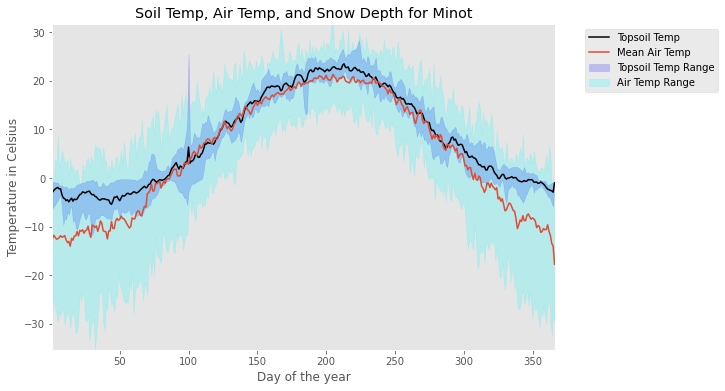

In [142]:
#888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888
#Need to update the mean dataframe so that the range for 'Topsoil' appears in the dataframe correctly

# load air temp data
at = pd.read_csv('https://raw.githubusercontent.com/the-datadudes/deepSoilTemperature/master/allStationsDailyAirTemp1.csv')

# set Date to a datetime format
at.Date = pd.to_datetime(at.Date)

# extract day of year
at['doy'] = at.Date.dt.dayofyear

# setting station for mean air temp data to whatever was picked for soil temp   
at = at[at.Station == selected_soil_station]

# groupby the day of year (doy) and aggregate min max and mean
atg = at.groupby('doy')['Temp'].agg([min, max, 'mean'])


#= Plotting the topsoil 
bx = mean.plot(x='Day', y='Topsoil', color='black', figsize=(9, 6), label='Topsoil Temp')

# Plotting soil temp range (still needs to be set to topsoil range instead of 20 cm range)
plt.fill_between(mean['Day'], mean['minTopsoil'], mean['maxTopsoil'], color='blue', alpha = 0.2, label='Topsoil Temp Range')

# add air temp plot to the bx plot with ax=bx
atg['mean'].plot(ax=bx, label='Mean Air Temp')

# add air temp fill between plot to the bx plot
bx.fill_between(atg.index, atg['min'], atg['max'], color='cyan', alpha = 0.2, label='Air Temp Range')

bx.set_xlabel("Day of the year")
bx.set_ylabel("Temperature in Celsius")
bx.set_title("Soil Temp, Air Temp, and Snow Depth for " + str(selected_soil_station))

# grid
bx.grid()

# set legend location
bx.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# remove margin spaces
plt.margins(0, 0)

#How to export this image to an image file (png)
#plt.savefig((str(selected_soil_station) + 'multiplot.png'), dpi=300, bbox_inches='tight')

plt.show()

In [143]:
mean.head()

,5 cm,10 cm,20 cm,30 cm,40 cm,50 cm,60 cm,80 cm,100 cm,125 cm,...,Day,Topsoil,maxx05,minn05,maxx10,minn10,maxx20,minn20,maxTopsoil,minTopsoil
Day,,,,,,,,,,,,,,,,,,,,,
1,-3.476158,-3.067950,-2.370950,-1.383158,-0.536567,0.226075,0.757125,1.886250,2.838908,3.878333,...,1,-2.971686,-1.200333,-7.329500,-0.961542,-6.463542,-0.695833,-5.063250,-0.952569,-6.285431
2,-2.953067,-2.672533,-2.172233,-1.364308,-0.598775,0.130650,0.664250,1.800175,2.748417,3.795742,...,2,-2.599278,-0.833875,-6.746292,-0.804000,-6.132167,-0.717875,-4.989417,-0.785250,-5.955958
3,-2.588558,-2.319492,-1.886642,-1.185017,-0.530467,0.133358,0.629517,1.733417,2.707650,3.762158,...,3,-2.264897,-1.189000,-6.312833,-0.930167,-5.686250,-0.621500,-4.651833,-0.913556,-5.550306
4,-2.381683,-2.141875,-1.725792,-1.074683,-0.474242,0.132292,0.597183,1.644233,2.575192,3.615267,...,4,-2.083117,-0.899292,-5.541833,-1.112958,-5.106708,-0.883500,-4.270042,-0.965250,-4.972861
5,-2.316125,-1.988208,-1.536575,-0.910642,-0.350217,0.221600,0.654883,1.657550,2.567592,3.598017,...,5,-1.946969,-1.126167,-5.113708,-0.910708,-4.684167,-0.648375,-3.932792,-0.895083,-4.576889


[Text(0, 0, ''),
 Text(0, 0, '1990'),
 Text(0, 0, '1995'),
 Text(0, 0, '2000'),
 Text(0, 0, '2005'),
 Text(0, 0, '2010'),
 Text(0, 0, '2015'),
 Text(0, 0, '2020')]

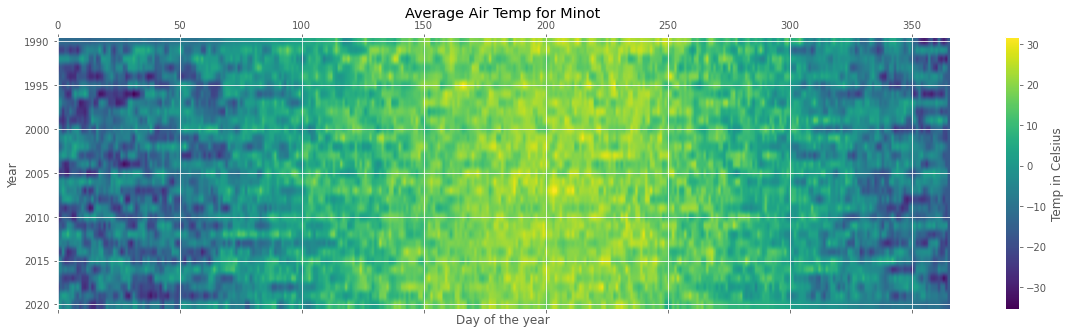

In [144]:
# links to Minot data if you want to pull from the web
##url2 = 'https://raw.githubusercontent.com/the-datadudes/deepSoilTemperature/master/allStationsDailyAirTemp1.csv'
raw_data = pd.read_csv('https://raw.githubusercontent.com/the-datadudes/deepSoilTemperature/master/allStationsDailyAirTemp1.csv', index_col=1, parse_dates=True)
df_all_stations = raw_data.copy()

# load the data into a DataFrame, not a Series
# parse the dates, and set them as the index
df1 = df_all_stations[df_all_stations['Station'] == selected_soil_station]


# groupby year and aggregate Temp into a list
dfg1 = df1.groupby(df1.index.year).agg({'Temp': list})

# create a wide format dataframe with all the temp data expanded
df1_wide = pd.DataFrame(dfg1.Temp.tolist(), index=dfg1.index)


# I hard-coded this line: rng = pd.date_range(start='1990-01-01', end='1990-04-23', freq='D') for Minot. 
# ---------Not sure how to do it dynamically ---- Did not find how during my research-----------
#  So, if you change station, you need to update the start date range so that it is from the beginning of the year 
#  to when the data starts.
# Ex: For Bottineau you would use:     rng = pd.date_range(start='1993-01-01', end='1993-01-02', freq='D')

rng = pd.date_range(start='1990-01-01', end='1990-04-24', freq='D')
df = pd.DataFrame(index= rng)
df.index = pd.to_datetime(df.index)
df['Temp'] = np.NaN
frames = [df, df1]
result = pd.concat(frames)
result = result[~((result.index.month == 2) & (result.index.day == 29))]

dfg1 = result.groupby(result.index.year).agg({'Temp': list})
df1_wide = pd.DataFrame(dfg1['Temp'].tolist(), index=dfg1.index)

# Setting all leftover empty fields to the average of that time in order to fill in the gaps
df1_wide = df1_wide.apply(lambda x: x.fillna(x.mean()),axis=0)

# ploting the data
fig, (ax1) = plt.subplots(ncols=1, figsize=(20, 5))

##ax1.set_title('Average Daily Air Temperature - Minot Station')
ax1.set_xlabel('Day of the year')
ax1.set_ylabel('Year')

# Setting the title so that it changes based off of the selected station
ax1.set_title('Average Air Temp for ' + str(selected_soil_station))

# Creating Colorbar  
cbm = ax1.matshow(df1_wide, interpolation=None, aspect='auto');

# Plotting the colorbar
cb = plt.colorbar(cbm, ax=ax1)
cb.set_label('Temp in Celsius')

#Changing the Y axis so that it reflects the year .
#It creates an ugly list above the visualization, but it gets the job done
#Adding this assumes that the data starts in 1990, so it only works with datasets that start in 1990
ax1.set_yticklabels(['']+df1_wide.index.tolist()[::5])
#plt.savefig((str(selected_soil_station) + '_airTempHeatMap.png'), dpi=300, bbox_inches='tight')